In [1]:
# import necessary package
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set up a few variables
inDir = '/Users/yuntse/data/supernova/flux/rf5.78'
outDir = '/Users/yuntse/data/supernova/flux/rf5.78_normalize'
fFactor = inDir + '/interpolate.txt'

In [3]:
# create the output directory if it doesn't exist
import os
if not os.path.exists(outDir):
    os.mkdir(outDir)

In [4]:
# import the normalization factor provided by Payel
normalize_data = np.loadtxt( fFactor )

In [5]:
# You can view the normalization factor loaded in this notebook
# Each row vector contains the information: (time, normalization)
normalize_data

array([[1.2   , 2.4791],
       [1.22  , 2.457 ],
       [1.24  , 2.4349],
       [1.26  , 2.4129],
       [1.28  , 2.3908],
       [1.3   , 2.3687],
       [1.32  , 2.3466],
       [1.34  , 2.3245],
       [1.36  , 2.3024],
       [1.38  , 2.2803],
       [1.4   , 2.2582],
       [1.42  , 2.2361],
       [1.44  , 2.2141],
       [1.46  , 2.192 ],
       [1.48  , 2.1699],
       [1.5   , 2.1478],
       [1.52  , 2.1257],
       [1.54  , 2.1036],
       [1.56  , 2.0815],
       [1.58  , 2.0594],
       [1.6   , 2.0373],
       [1.62  , 2.0153],
       [1.64  , 1.9932],
       [1.66  , 1.9711],
       [1.68  , 1.949 ],
       [1.7   , 1.9269],
       [1.72  , 1.9048],
       [1.74  , 1.8827],
       [1.76  , 1.8606],
       [1.78  , 1.8386],
       [1.8   , 1.8165],
       [1.82  , 1.7944],
       [1.84  , 1.7723],
       [1.86  , 1.7502],
       [1.88  , 1.7281],
       [1.9   , 1.706 ],
       [1.92  , 1.6839],
       [1.94  , 1.6618],
       [1.96  , 1.6398],
       [1.98  , 1.6177],


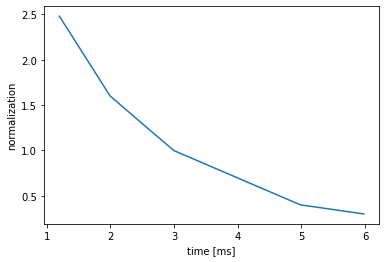

In [6]:
# Plot the normalization factor versus time
plt.plot(normalize_data[:,0], normalize_data[:,1])
plt.xlabel('time [ms]')
plt.ylabel('normalization')
plt.show()

In [7]:
# Setup a script to load the non-normalized flux in the 'sn_flux' folder and times the normalization factor
flux = np.loadtxt(inDir + '/rf' + str(normalize_data[0,0]) + '.dat')

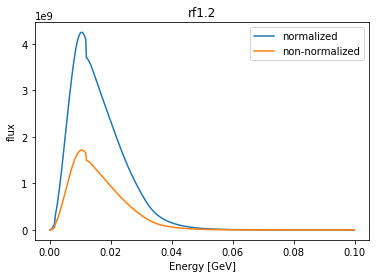

In [8]:
plt.plot(flux[:,0], normalize_data[0,1]*flux[:,1], label = 'normalized')
plt.plot(flux[:,0], flux[:,1], label = 'non-normalized')
plt.xlabel('Energy [GeV]')
plt.ylabel('flux')
plt.title('rf1.2')
plt.legend()
plt.show()

In [9]:
# Writing a batch script to correct all the flux with proper normalization factor and save it
for i in range(len(normalize_data)):
    # load the non-normalized flux rfx.x.dat in the 'flux' folder
    # x.x is the time stamp of the flux given in the first column of the normalize_data
    sn_flux = np.loadtxt(inDir + '/rf' + str(normalize_data[i,0]) + '.dat')

    # Times the normalization factor to the flux
    sn_flux[:,1:] = sn_flux[:,1:]*normalize_data[i,1]
    
    # Save the corrected flux to the new folder 'corrected_flux'
    np.savetxt(outDir + '/rf' + str(normalize_data[i,0]) + '_normalized.dat', sn_flux, fmt='%.5e')
    
    # If the time stamp x.x > 5.98, there is no corresponding flux to be normalized,
    # we should break the for-loop
    # Some comment: Write down the if-else block to break the for-loop in the bottom of this script
    # is not a quite good in my sense. One should move this if-else block to the top of this script.
    # You should try to modify this if-else block and move it to the top.
    if normalize_data[i,0]==5.98:
        break
    else:
        pass
    
# After running this script, you should find the fluxes that are needed normalizations
# in the 'normalized_flux' folder

In [10]:
# Check our normalized flux
norm_sn_flux = np.loadtxt(outDir + '/rf1.2_normalized.dat')

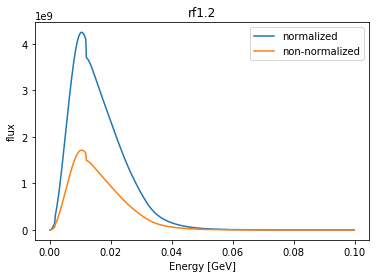

In [11]:
# Plot the result, this figure must be the same as the last figure
plt.plot(flux[:,0], norm_sn_flux[:,1], label = 'normalized')
plt.plot(flux[:,0], flux[:,1], label = 'non-normalized')
plt.xlabel('Energy [GeV]')
plt.ylabel('flux')
plt.title('rf1.2')
plt.legend()
plt.show()

In [12]:
# # Copy the files which don't have to be normalized
# # List all the input files
# list = os.listdir(inDir)

In [13]:
# for f in list:
#     # if the file is the normalization factor file, skip it 
#     # (because I put this file in the same directory as the other flux files)
#     if f[-3:] == 'txt':
#         continue
#     # if not, it is a flux file.  Check if the time slice is in the normalization factor file
#     # if the time slice doesn't exist in the normalization factor file, copy the original file to the new directory
#     if not f[2:-4] in str(normalize_data[:,0]):
#         srcFile = inDir + '/' + f
#         dstFile = outDir + '/' + f[:-4] + '_normalized.dat'
#         command = 'cp ' + srcFile + ' ' + dstFile
#         # print(command)
#         os.system(command)

In [14]:
# # Sanity check
# flux2 = np.loadtxt(inDir + '/rf1.28.dat')
# norm_sn_flux2 = np.loadtxt(outDir + '/rf1.28_normalized.dat')

In [15]:
# # Plot the result, the two curves here should be identical since one is a copy of the other
# plt.plot(flux2[:,0], norm_sn_flux2[:,1], label = 'normalized')
# plt.plot(flux2[:,0], flux2[:,1], label = 'non-normalized')
# plt.xlabel('Energy [GeV]')
# plt.ylabel('flux')
# plt.title('rf1.28')
# plt.legend()
# plt.show()

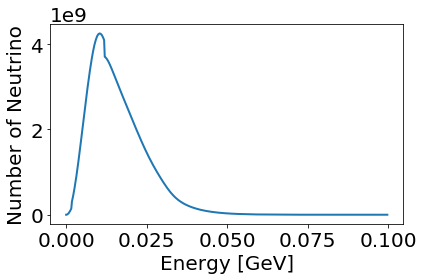

In [23]:
# Plot only the result

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.plot(flux[:,0], norm_sn_flux[:,1], label = 'normalized', linewidth = 2)
plt.xlabel('Energy [GeV]', fontsize=20)
plt.ylabel('Number of Neutrino', fontsize=20)
# plt.title('rf1.2')
# plt.legend()
# plt.show()
plt.tight_layout()
plt.savefig('rf1.2.pdf')